Small test of conversion from Relate format into tskit

In [1]:
%run ../scripts/notebook_settings_lean.py
import tskit

/faststorage/project/baboondiversity/people/eriks/second_analysis_baboons/scripts/notebook_settings_lean.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'png')


In [2]:
ts = tskit.load("../steps/all_individuals_relate/chromX_tskit.trees")

In [3]:
ts.diversity()

0.0013148482961617984

In [4]:
first_tree = ts.first()

In [5]:
ts

In [6]:
ts.nodes()

In [7]:
s_max, s_min = 0, 100
for s in ts.at(136387268).samples():
    #print(s)
    if s > s_max:
        s_max = s
    if s < s_min:
        s_min = s
print(s_max, s_min)

195 0


In [8]:
98*2

196

In [9]:
test_tree = ts.at(136174464)

In [10]:
poplabels = pd.read_csv("../data/pops/all_females_8cluster.sample", sep=" ",
                        names=["i", "ID", "POP", "GROUP", "SEX"], header=0)

In [29]:
poplabels

,i,ID,POP,GROUP,SEX
0,0,Sci_16066,Eastern Yellow,Eastern Yellow,female
1,1,Sci_16098,Eastern Yellow,Eastern Yellow,female
2,4,Sci_34449,Kindae,Kindae,female
3,5,Sci_34474,Kindae,Kindae,female
4,7,Sci_97074,Hamadryas,Hamadryas,female
...,...,...,...,...,...
93,220,PD_0788,Kindae,Kindae,female
94,221,PD_0789,Kindae,Kindae,female
95,222,PD_0790,Kindae,Kindae,female
96,223,PD_0791,Kindae,Kindae,female


In [12]:
d_west_mapping = {}
for i, row in poplabels.iterrows():
    if row.GROUP == "Western Yellow":
        d_west_mapping[i*2] = "W"
        d_west_mapping[i*2+1] = "W"

In [13]:
d_east_mapping = {}
for i, row in poplabels.iterrows():
    if row.GROUP == "Eastern Yellow":
        d_east_mapping[i*2] = "E"
        d_east_mapping[i*2+1] = "E"

In [14]:
d_to_mapping = {}
for i, row in poplabels.iterrows():
    if row.GROUP == "Tanzanian Olive":
        d_to_mapping[i*2] = "T"
        d_to_mapping[i*2+1] = "T"

In [15]:
d_k_mapping = {}
for i, row in poplabels.iterrows():
    if row.GROUP == "Kindae":
        d_k_mapping[i*2] = "K"
        d_k_mapping[i*2+1] = "K"

In [16]:
d_west_mapping

{48: 'W', 49: 'W', 110: 'W', 111: 'W', 112: 'W', 113: 'W'}

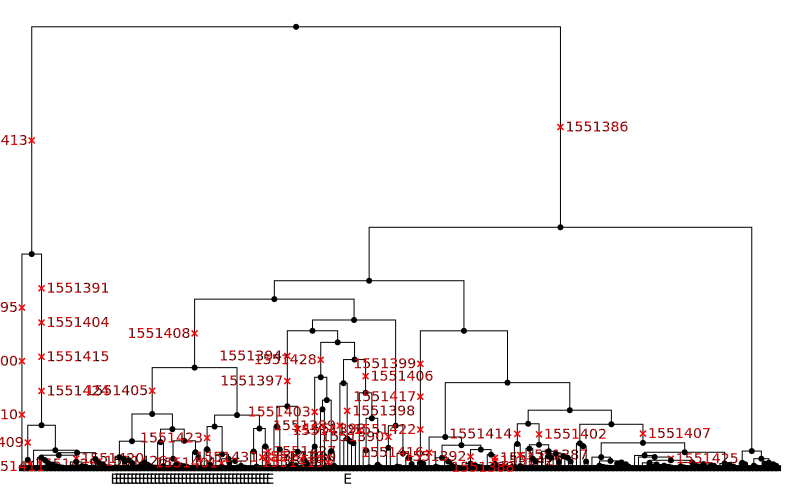

In [17]:
test_tree.draw_svg(size=(800,500), node_labels=d_east_mapping, order="tree")

In [18]:
# Setup based on poplabels
i_mapping = {}
for i, row in poplabels.iterrows():
    i_mapping[i*2] = row.GROUP
    i_mapping[i*2+1] = row.GROUP
poplabel_counts = poplabels["GROUP"].value_counts().to_dict()
highest_ID = poplabels.index.max()*2+1

In [36]:
poplabels.loc[poplabels.ID == "PD_0788"].index.values[0]

93

In [19]:
i_mapping

{0: 'Eastern Yellow',
 1: 'Eastern Yellow',
 2: 'Eastern Yellow',
 3: 'Eastern Yellow',
 4: 'Kindae',
 5: 'Kindae',
 6: 'Kindae',
 7: 'Kindae',
 8: 'Hamadryas',
 9: 'Hamadryas',
 10: 'Tanzanian Olive',
 11: 'Tanzanian Olive',
 12: 'Tanzanian Olive',
 13: 'Tanzanian Olive',
 14: 'Tanzanian Olive',
 15: 'Tanzanian Olive',
 16: 'Tanzanian Olive',
 17: 'Tanzanian Olive',
 18: 'Tanzanian Olive',
 19: 'Tanzanian Olive',
 20: 'Tanzanian Olive',
 21: 'Tanzanian Olive',
 22: 'Tanzanian Olive',
 23: 'Tanzanian Olive',
 24: 'Tanzanian Olive',
 25: 'Tanzanian Olive',
 26: 'Tanzanian Olive',
 27: 'Tanzanian Olive',
 28: 'Tanzanian Olive',
 29: 'Tanzanian Olive',
 30: 'Eastern Yellow',
 31: 'Eastern Yellow',
 32: 'Eastern Yellow',
 33: 'Eastern Yellow',
 34: 'Eastern Yellow',
 35: 'Eastern Yellow',
 36: 'Tanzanian Olive',
 37: 'Tanzanian Olive',
 38: 'Tanzanian Olive',
 39: 'Tanzanian Olive',
 40: 'Tanzanian Olive',
 41: 'Tanzanian Olive',
 42: 'Eastern Yellow',
 43: 'Eastern Yellow',
 44: 'Eastern 

In [20]:
highest_ID = poplabels.index.max()*2+1

In [21]:
lowest_depth = test_tree.depth(0)
for i in range(highest_ID):
    current_node = i
    if lowest_depth > test_tree.depth(current_node):
        lowest_depth = test_tree.depth(current_node)
        print(lowest_depth)

7
5
2


In [22]:
# Version which uses first coalescence
def naive_coalescence_ordering(tree, IDs, sample_counts):
    df_list = []
    for i in IDs:
        pop_list = []
        gen_list = []
        current_node = i
        while test_tree.depth(current_node) > 0:
            # Find parent node
            parent_node = test_tree.parent(current_node)
            # Determine children, and then pick alternate
            # cannot find a method for this, so I use an explicit if/else
            children = test_tree.children(parent_node)
            if current_node == children[0]:
                alt_node = children[1]
            else:
                alt_node = children[0]
            # Determine which populations are present under the alternate node
            alt_samples = pd.Series([x for x in test_tree.samples(alt_node)])
            set_of_pops = set(alt_samples.map(i_mapping))
            # If pop is not already added to list, add pop and note coal time
            for p in set_of_pops:
                if p  not in pop_list:
                    pop_list.append(p)
                    gen_list.append(test_tree.time(current_node))
            current_node = parent_node
        d = {"ID": i, "sites": tree.num_sites, "span": tree.span, "start": tree.interval[0]}
        for i in range(len(pop_list)):
            d["coal_{}".format(i)] = pop_list[i]
        for i in range(len(gen_list)):
            d["coal_date_{}".format(i)] = gen_list[i]
        df_list.append(pd.DataFrame(d, index=[i]))
    return pd.concat(df_list)

In [23]:
# Version which counts number of samples, and only notes as coalescence if over 50 % of pop is coalesced.
def coalescence_ordering(tree, IDs, sample_counts):
    df_list = []
    for i in IDs:
        pop_list = []
        gen_list = []
        coal_counts = {}
        for p in sample_counts.index:
            coal_counts[p] = 0
        current_node = i
        while tree.depth(current_node) > 0:
            # Find parent node
            parent_node = tree.parent(current_node)
            # Determine children, and then pick alternate
            # cannot find a method for this, so I use an explicit if/else
            children = tree.children(parent_node)
            if current_node == children[0]:
                alt_node = children[1]
            else:
                alt_node = children[0]
            # Determine which populations are present under the alternate node
            alt_samples = pd.Series([x for x in tree.samples(alt_node)])
            alt_sample_counts = alt_samples.map(i_mapping).value_counts()
            for p in alt_sample_counts.index:
                coal_counts[p] += alt_sample_counts[p]
            # If pop is not already added to list, add pop and note coal time
            for p in alt_sample_counts.index:
                if p  not in pop_list and coal_counts[p] > sample_counts[p]/2:
                    pop_list.append(p)
                    gen_list.append(tree.time(current_node))
            current_node = parent_node
        d = {"ID": i, "sites": tree.num_sites, "span": tree.span, "start": tree.interval[0]}
        for i in range(len(pop_list)):
            d["coal_{}".format(i)] = pop_list[i]
        for i in range(len(gen_list)):
            d["coal_date_{}".format(i)] = gen_list[i]
        df_list.append(pd.DataFrame(d, index=[i]))
    return pd.concat(df_list)

In [24]:
list(i_mapping.keys())[100:102]

[100, 101]

In [25]:
%%timeit -n 10
c = 0
ID_list = list(i_mapping.keys())[10:12]
sample_counts = poplabels["GROUP"].value_counts()*2
for tree in ts.trees():
    if c >= 1:
        break
    df = naive_coalescence_ordering(tree, ID_list, sample_counts)
    c += 1

663 ms ± 3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%%timeit -n 10
c = 0
ID_list = list(i_mapping.keys())[10:12]
sample_counts = poplabels["GROUP"].value_counts()*2
for tree in ts.trees():
    if c >= 1:
        break
    df = coalescence_ordering(tree, ID_list, sample_counts)
    c += 1

676 ms ± 5.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
ID_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [27]:
c = 0
ID_list = list(i_mapping.keys())
sample_counts = poplabels["GROUP"].value_counts()*2
df_list = []
for tree in ts.trees():
    df = coalescence_ordering(tree, ID_list, sample_counts)
    if c % 2500 == 0:
        print(c)
    c += 1
    df_list.append(df)
full_df = pd.concat(df_list)

0


KeyboardInterrupt: 

Reading in the df from the analysis workflow.

In [ ]:
import glob
df_l = []
for p in glob.glob("../steps/relate_coal_ordering/PD*"):
    print(p)
    df_l.append(pd.read_csv(p))
full_df = pd.concat(df_l)

../steps/relate_coal_ordering/PD_0272.txt
../steps/relate_coal_ordering/PD_0737.txt
../steps/relate_coal_ordering/PD_0730.txt
../steps/relate_coal_ordering/PD_0209.txt
../steps/relate_coal_ordering/PD_0503.txt
../steps/relate_coal_ordering/PD_0745.txt
../steps/relate_coal_ordering/PD_0200.txt
../steps/relate_coal_ordering/PD_0770.txt
../steps/relate_coal_ordering/PD_0685.txt
../steps/relate_coal_ordering/PD_0232.txt
../steps/relate_coal_ordering/PD_0653.txt
../steps/relate_coal_ordering/PD_0682.txt
../steps/relate_coal_ordering/PD_0240.txt
../steps/relate_coal_ordering/PD_0693.txt
../steps/relate_coal_ordering/PD_0199.txt
../steps/relate_coal_ordering/PD_0694.txt
../steps/relate_coal_ordering/PD_0224.txt
../steps/relate_coal_ordering/PD_0754.txt
../steps/relate_coal_ordering/PD_0492.txt
../steps/relate_coal_ordering/PD_0211.txt
../steps/relate_coal_ordering/PD_0677.txt
../steps/relate_coal_ordering/PD_0216.txt
../steps/relate_coal_ordering/PD_0495.txt
../steps/relate_coal_ordering/PD_0

In [ ]:
full_df

In [5]:
full_df.loc[full_df.sites == full_df.sites.max()]

,ID,sites,span,start,coal_0,coal_1,coal_2,coal_3,coal_4,coal_5,coal_6,coal_7,coal_date_0,coal_date_1,coal_date_2,coal_date_3,coal_date_4,coal_date_5,coal_date_6,coal_date_7
236600,10,198,22870.0,140195283.0,Tanzanian Olive,Papio,Ethiopian Olive,Eastern Yellow,Hamadryas,Western Yellow,Chacma,Kindae,6032.072266,6757.114258,11481.850586,14838.492188,14838.492188,14838.492188,14838.492188,31410.486328
236601,11,198,22870.0,140195283.0,Tanzanian Olive,Papio,Ethiopian Olive,Eastern Yellow,Hamadryas,Western Yellow,Chacma,Kindae,4939.815918,6757.114258,11481.850586,14838.492188,14838.492188,14838.492188,14838.492188,31410.486328


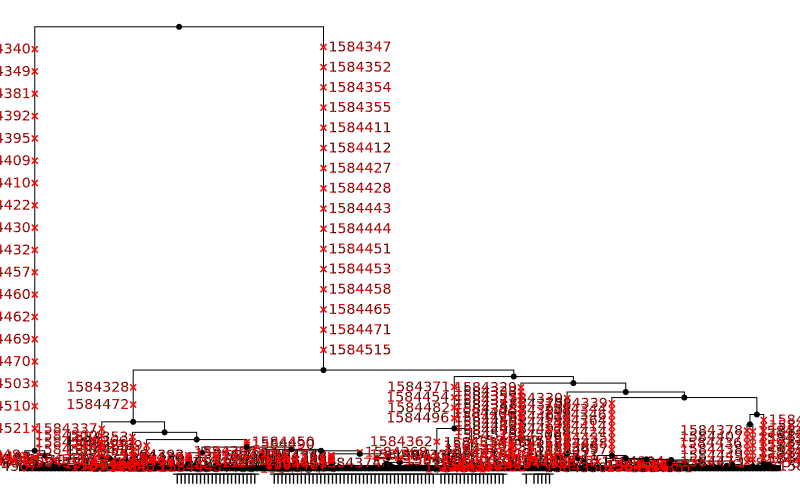

In [14]:
ts.at(140195283).draw_svg(size=(800,500), node_labels=d_to_mapping, order="tree")

<AxesSubplot:xlabel='coal_date_0', ylabel='Count'>

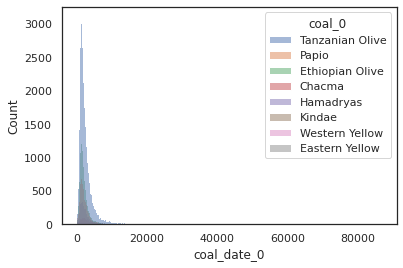

In [38]:
sns.histplot(data=full_df, x="coal_date_0", hue="coal_0")

<AxesSubplot:xlabel='sites', ylabel='Count'>

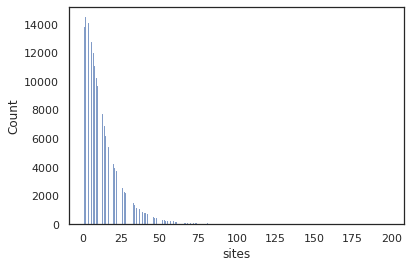

In [39]:
sns.histplot(data=full_df, x="sites")

In [32]:
subset_df = full_df.loc[(full_df.sites > 30) & (full_df.ID == 10)]
id_df = full_df.loc[(full_df.ID == 10)]

In [33]:
id_df

,ID,sites,span,start,coal_0,coal_1,coal_2,coal_3,coal_4,coal_5,coal_6,coal_7,coal_date_0,coal_date_1,coal_date_2,coal_date_3,coal_date_4,coal_date_5,coal_date_6,coal_date_7
7,10,5,71983.0,0.0,Tanzanian Olive,Eastern Yellow,Hamadryas,Ethiopian Olive,Western Yellow,Kindae,Papio,Chacma,900.246643,900.246643,900.246643,900.246643,900.246643,26066.427734,26066.427734,26066.427734
7,10,33,1242.0,71983.0,Tanzanian Olive,Eastern Yellow,Hamadryas,Ethiopian Olive,Western Yellow,Kindae,Papio,Chacma,1114.393677,1114.393677,1114.393677,1114.393677,1114.393677,19285.058594,19285.058594,19285.058594
7,10,3,49.0,73225.0,Tanzanian Olive,Eastern Yellow,Hamadryas,Ethiopian Olive,Western Yellow,Kindae,Papio,Chacma,1450.457397,2302.958496,2302.958496,2302.958496,2302.958496,8291.375977,8291.375977,9792.259766
7,10,12,280.0,73274.0,Tanzanian Olive,Eastern Yellow,Hamadryas,Ethiopian Olive,Western Yellow,Kindae,Papio,Chacma,1666.595825,4218.661133,4218.661133,4218.661133,4218.661133,10572.315430,10572.315430,11394.324219
7,10,2,55.0,73554.0,Tanzanian Olive,Eastern Yellow,Hamadryas,Ethiopian Olive,Western Yellow,Kindae,Papio,Chacma,1002.031982,3214.421631,3214.421631,3214.421631,3214.421631,10137.990234,10137.990234,20298.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,10,25,1652.0,143656204.0,Ethiopian Olive,Tanzanian Olive,Papio,Hamadryas,Eastern Yellow,Chacma,Kindae,Western Yellow,2576.130615,2576.130615,4537.006836,8993.223633,12890.927734,12890.927734,22192.458984,22192.458984
7,10,5,322.0,143657856.0,Ethiopian Olive,Papio,Tanzanian Olive,Eastern Yellow,Hamadryas,Chacma,Kindae,Western Yellow,2270.546387,3238.833008,4058.732422,9602.547852,9602.547852,9602.547852,14729.034180,14729.034180
7,10,13,1286.0,143658178.0,Tanzanian Olive,Ethiopian Olive,Papio,Chacma,Hamadryas,Eastern Yellow,Kindae,Western Yellow,1628.221680,1628.221680,3356.577393,4543.878418,5392.956543,6882.983887,27700.523438,27700.523438
7,10,19,2051.0,143659464.0,Tanzanian Olive,Ethiopian Olive,Papio,Hamadryas,Eastern Yellow,Chacma,Kindae,Western Yellow,1369.800659,1369.800659,3002.192383,4448.353516,7791.793457,7791.793457,13374.691406,13374.691406


In [34]:
subset_df

,ID,sites,span,start,coal_0,coal_1,coal_2,coal_3,coal_4,coal_5,coal_6,coal_7,coal_date_0,coal_date_1,coal_date_2,coal_date_3,coal_date_4,coal_date_5,coal_date_6,coal_date_7
7,10,33,1242.0,71983.0,Tanzanian Olive,Eastern Yellow,Hamadryas,Ethiopian Olive,Western Yellow,Kindae,Papio,Chacma,1114.393677,1114.393677,1114.393677,1114.393677,1114.393677,19285.058594,19285.058594,19285.058594
7,10,50,2077.0,133599.0,Tanzanian Olive,Chacma,Eastern Yellow,Kindae,Ethiopian Olive,Papio,Hamadryas,Western Yellow,786.937439,3300.292969,8175.136230,8175.136230,8175.136230,8175.136230,8175.136230,8175.136230
7,10,34,1863.0,137621.0,Tanzanian Olive,Chacma,Eastern Yellow,Ethiopian Olive,Kindae,Papio,Hamadryas,Western Yellow,1678.987549,4407.756836,18300.607422,18300.607422,18300.607422,18300.607422,18300.607422,18300.607422
7,10,44,2035.0,145009.0,Tanzanian Olive,Kindae,Chacma,Eastern Yellow,Western Yellow,Ethiopian Olive,Papio,Hamadryas,1931.008057,7555.597168,7555.597168,16960.734375,16960.734375,24101.017578,24101.017578,24101.017578
7,10,36,1942.0,184283.0,Tanzanian Olive,Ethiopian Olive,Papio,Hamadryas,Eastern Yellow,Kindae,Western Yellow,Chacma,891.464539,891.464539,4312.394043,9246.949219,17094.076172,17094.076172,17094.076172,17094.076172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,10,64,8542.0,143618811.0,Ethiopian Olive,Tanzanian Olive,Papio,Western Yellow,Hamadryas,Chacma,Eastern Yellow,Kindae,5714.794922,7042.295410,7042.295410,7042.295410,11795.719727,11795.719727,29383.363281,29383.363281
7,10,57,5177.0,143628468.0,Tanzanian Olive,Ethiopian Olive,Hamadryas,Papio,Chacma,Western Yellow,Eastern Yellow,Kindae,7902.160645,7902.160645,7902.160645,7902.160645,7902.160645,7902.160645,24789.068359,24789.068359
7,10,33,3722.0,143634019.0,Ethiopian Olive,Tanzanian Olive,Hamadryas,Papio,Chacma,Western Yellow,Eastern Yellow,Kindae,5970.540527,7400.014648,7400.014648,7400.014648,7400.014648,7400.014648,23194.408203,23194.408203
7,10,62,4541.0,143638047.0,Ethiopian Olive,Tanzanian Olive,Hamadryas,Papio,Chacma,Western Yellow,Eastern Yellow,Kindae,6750.385742,7872.969238,7872.969238,7872.969238,7872.969238,7872.969238,18791.806641,18791.806641


<AxesSubplot:xlabel='start', ylabel='coal_date_0'>

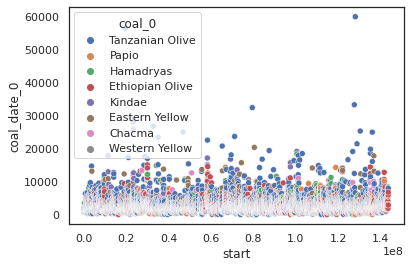

In [35]:
sns.scatterplot(data=subset_df, y="coal_date_0", x="start", hue="coal_0")

In [36]:
tree.draw_svg(size=(800,500), node_labels=d_k_mapping, order="tree")

KeyError: 1637599

In [ ]:
for current_node in test_tree.nodes(i):
    print(current_node)